## Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))

## Load dataset


In [3]:
df = pd.read_csv('spam.csv')
df

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<AxesSubplot:xlabel='Label', ylabel='count'>

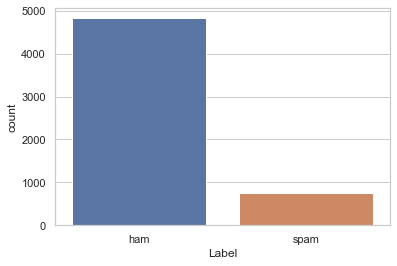

In [5]:
# countplot for categories
sns.set_theme(style="whitegrid")
sns.countplot(data=df,x='Label')

## Data Visualization

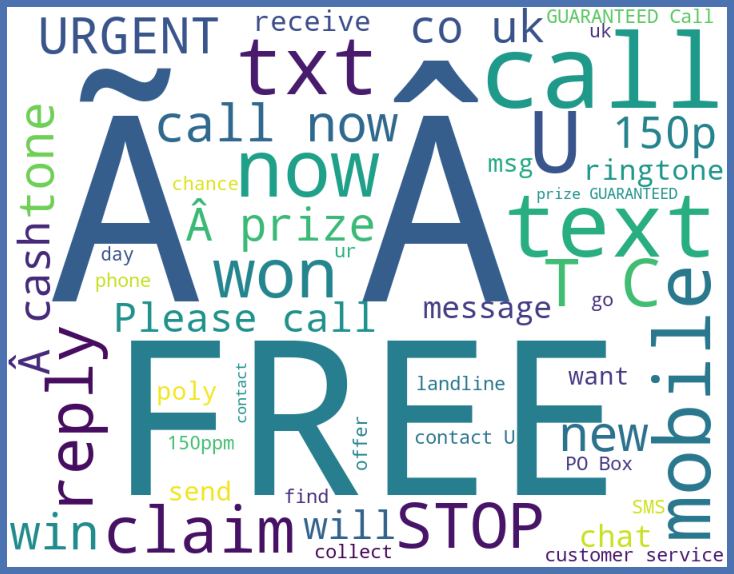

In [6]:
from wordcloud import WordCloud
spams = df['EmailText'][df['Label']=='spam']
spam_cloud1 = WordCloud(width=900, height= 700, background_color='white', max_words = 50).generate(" ".join(spams))
plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

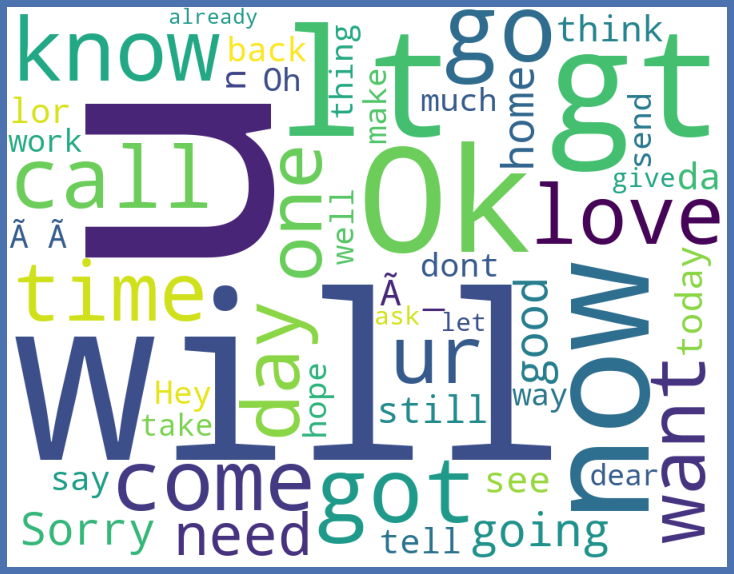

In [7]:
ham = df['EmailText'][df['Label']=='ham']
spam_cloud2 = WordCloud(width=900, height= 700, background_color='white', max_words = 50).generate(" ".join(ham))
plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud2)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Pre-processing

In [8]:
# convert message into lowercase
df['EmailText'] = df['EmailText'].str.lower()
df

,Label,EmailText
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ã_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


In [9]:
# remove punctuations
df['EmailText'] = df['EmailText'].str.replace(r'[^\w\d\s]',' ')
df

,Label,EmailText
0,ham,go until jurong point crazy available only ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives aro...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ã _ b going to esplanade fr home
5569,ham,pity was in mood for that so any other s...
5570,ham,the guy did some bitching but i acted like i d...


In [10]:
# remove stopwords
df['EmailText'] = df['EmailText'].apply(lambda x: " ".join(term for term in x.split() if term not in stops))
df

,Label,EmailText
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact u u ã â 750 pound pri...
5568,ham,ã _ b going esplanade fr home
5569,ham,pity mood suggestions
5570,ham,guy bitching acted like interested buying some...


In [11]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(df['EmailText'])
x = features # Inputs
y = df.Label # Outputs

In [12]:
x

<5572x8543 sparse matrix of type '<class 'numpy.float64'>'
	with 47136 stored elements in Compressed Sparse Row format>

In [13]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Label, Length: 5572, dtype: object

In [14]:
# splitting dataset into training and testing data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, shuffle=True, random_state = 10)

In [15]:
xtrain.shape

(4179, 8543)

In [16]:
ytrain.shape

(4179,)

## Initializing and fitting model

In [17]:
naive = MultinomialNB()
svm = SVC(C=1.0, kernel = 'linear', degree = 3, gamma = 'auto')

In [18]:
naive.fit(xtrain,ytrain)

MultinomialNB()

In [19]:
svm.fit(xtrain, ytrain)

SVC(gamma='auto', kernel='linear')

## Predicting and calculating accuracy score

In [20]:
y_pred_naive = naive.predict(xtest)
print('Naive Socre ->', accuracy_score(ytest, y_pred_naive))

Naive Socre -> 0.964824120603015


In [21]:
y_pred_svm = svm.predict(xtest)
print('SVM Socre ->', accuracy_score(ytest, y_pred_svm))

SVM Socre -> 0.9755922469490309


## Classification Report

In [22]:
print('Classification report for Naive:\n\n',classification_report(ytest, y_pred_naive))

Classification report for Naive:

               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1201
        spam       1.00      0.74      0.85       192

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.92      1393
weighted avg       0.97      0.96      0.96      1393



In [23]:
print('Classification report for SVM:\n\n',classification_report(ytest, y_pred_svm))

Classification report for SVM:

               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1201
        spam       0.99      0.83      0.90       192

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.94      1393
weighted avg       0.98      0.98      0.97      1393



## Saving the model

In [24]:
import pickle

In [25]:
file1 = 'Email_spam_naive.pkl'
model1 = open(file1,'wb')
pickle.dump(naive, model1)
model1.close()

In [26]:
file2 = 'Email_spam_svm.pkl'
model2 = open(file2,'wb')
pickle.dump(svm, model2)
model2.close()